In [1]:
%matplotlib inline

/home/nbuser/anaconda2_410/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy
import sympy

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt

A Naive Approach
================

...consisting of creating a complex grid and simply taking the square root of the grid.

In [3]:
a,b = -1,1
n = 16
x,y = numpy.mgrid[a:b:(1j*n),a:b:(1j*n)]
z = x + 1j*y
w = z**2

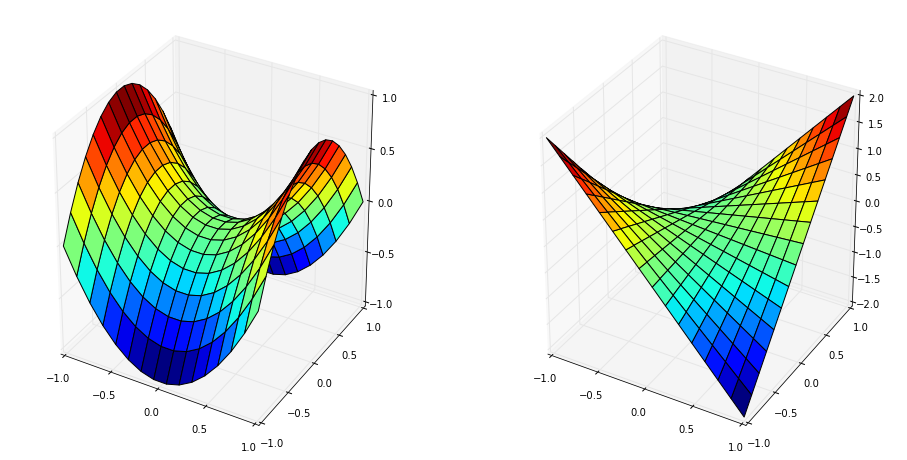

In [4]:
fig = plt.figure(figsize=(16,8))

# plot the real part
ax_real = fig.add_subplot(1,2,1,projection='3d')
ax_real.plot_surface(z.real, z.imag, w.real,
                    rstride=1, cstride=1, cmap=cm.jet)

# plot the imaginary part
ax_imag = fig.add_subplot(1,2,2,projection='3d')
ax_imag.plot_surface(z.real, z.imag, w.imag,
                    rstride=1, cstride=1, cmap=cm.jet)

In [5]:
a,b = -1,1
n = 16
x,y = numpy.mgrid[a:b:(1j*n),a:b:(1j*n)]
z = x + 1j*y
w = numpy.sqrt(z)

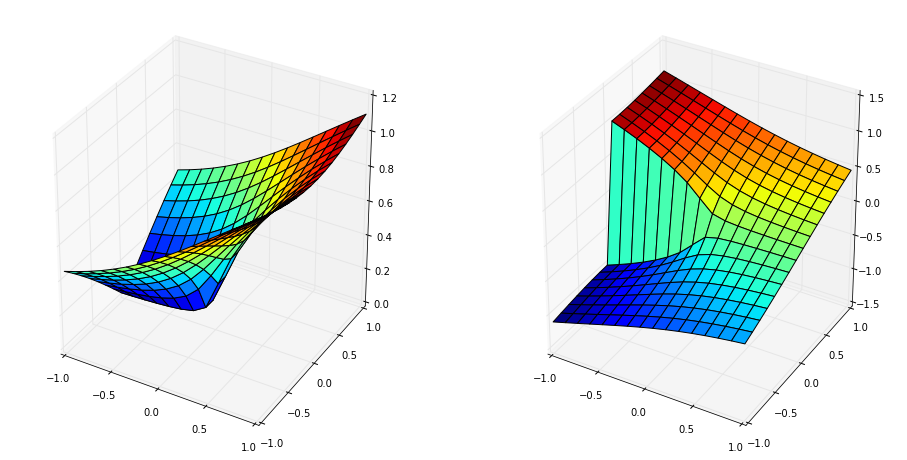

In [6]:
fig = plt.figure(figsize=(16,8))

# plot the real part
ax_real = fig.add_subplot(1,2,1,projection='3d')
ax_real.plot_surface(z.real, z.imag, w.real,
                    rstride=1, cstride=1, cmap=cm.jet)

# plot the imaginary part
ax_imag = fig.add_subplot(1,2,2,projection='3d')
ax_imag.plot_surface(z.real, z.imag, w.imag,
                    rstride=1, cstride=1, cmap=cm.jet)

The Issue
=========

In many (all) complex square-root functions a branch cut is chosen (usually the negative real axis) and only one branch is computed in order to make square root single-valued.

From complex analysis we learn that we can use polar coordinates to easily verify that $w = \sqrt{z}$, which I will read as $w^2 = z$ since the latter makes it clear that I won't be chosing a branch of $w$ / making a branch cut in the $z$ plane. Because the branch point $z=0$ is 2-ramified / has branching number two I will need to make two rotations to capture all of the behavior near the branch point.

In [7]:
branching_number = 2

Nr = 16
Ntheta = 32

# compute the theta,R domain
theta = numpy.linspace(0,2*numpy.pi*branching_number, Ntheta)
r = numpy.linspace(0,1,Nr)
Theta, R = numpy.meshgrid(theta,r)

z = R*numpy.exp(1j*Theta)

# compute w^2 = z. THE KEY IDEA is to pass the exponentiation by 1/2 into exp().
w = numpy.sqrt(R)*numpy.exp(1j*Theta/2)

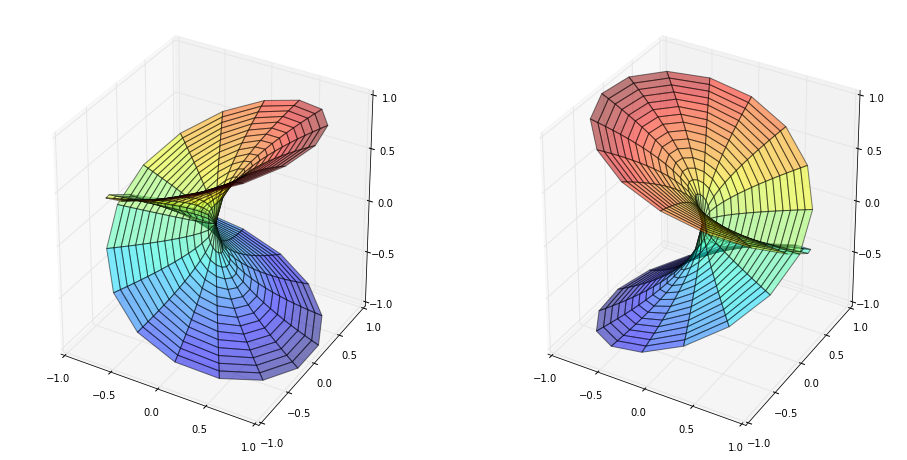

In [8]:
fig = plt.figure(figsize=(16,8))

# plot the real part
ax_real = fig.add_subplot(1,2,1,projection='3d')
ax_real.plot_surface(z.real, z.imag, w.real,
                    rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)

# plot the imaginary part
ax_imag = fig.add_subplot(1,2,2,projection='3d')
ax_imag.plot_surface(z.real, z.imag, w.imag,
                    rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)